# Suggested order to complete this assignment:
1. **metrics.py**
2. **generate_regression_data.py**
3. **polynomial_regression.py**
4. **perceptron.py**


**suggested order for tests:**
<br>
test_mean_squared_error <br>
test_generate_regression_data <br>
test_polynomial_regression <br>
test_perceptron <br>
test_transform_data

# generate_regression_data.py:
We want to generate a **X** array and a **Y** array that roughly have polynomial relationship, i.e. <br>
say degree = 4, then we want $y = a * x^4 + b * x^3 + c * x^2 + d * x + e$ for each of the N data points. We randonly select $x$ and the coefficients $a, b, c, d, e$, and then use them to generate (compute) $y$. 

Be careful that if degree is 4, we need 5 coefficients for the extra constant term. 

Here are some helpful functions:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 20) #return 20 evenly spaced numbers from -1 to 1
x

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [13]:
coef = np.random.uniform(-10, 10, 4) #generate random numbers from -10 to 10 based on uniform distribution
coef

array([ 9.11738881,  7.00565435, -3.53075503, -7.1395632 ])

In [1]:
coefficients = [1, 2, 3, 4, 5]
p = np.poly1d(coefficients) #note degree is 4 here

# IMPORTANT: keep note of the order of the coefficients; the last element is the constant
y_arr = p(x)
print(p) 
print(y_arr)
plt.scatter(x, y_arr)

NameError: name 'np' is not defined

Note above, **<code>np.poly1d</code>** outputs a **function** $y = 1 * x^4 + 2 * x^3 + 3 * x^2 + 4 * x + 5$. <br>
p can take an array of numbers as input and computes the $y$ value based on the given $x$.

To add some noise: 
1. computer std of the $y$ array using **```np.std(y)```**
2. (from instruction) <code>y_noise = y + np.random.normal(loc=0.0, scale=1.5*2.0, size=y.shape)</code>

# polynomial_regression.py:
1. We assume that ```features``` and ```targets``` have a polynomial relationship with degree ```degree``` (specified in ```_init_```). Givern ```features```, ```targets```, and ```degree```, we want to find appropriate ```coefficients``` for the model to perform prediction. 
2. We want to access ```coefficients``` in the ```predict``` function, so what's the easist way to do it?
3. In **```fit```**, 
 * Turn ```features``` - a 1d array - into a 2d array **```X```** of shape (num_features, degree+1), so that the ```[i ,j] ``` entry of **```X```** is equal to **ith** elemnt in ```features``` to the **jth** power. **Make sure the first (0th) column of** **```X```** **is a column of 1s (for the constant term)**. 
 * Since luckily we have a closed form formula for linear regression, we can simply use **```np.transpose```**, **```np.matmul```** and **```np.linalg.inv```** to compute the coefficients.  
 * Store the coefficients so that we can access them in the ```predict``` function
4. In **```predict```**, 
 * We already have the coefficients from ```fit```. To predict, we apply a polynomial function of degree ```degree``` and those coefficients to the input ```features```.  
 * Create a **```X```** array, just like you did for ```fit```
 * One option to get prediction: You could still use **```np.poly1d```**, but be careful that **```np.poly1d```** applies its input coefficient array in decreasing order (constant term is the last element), but the coefficients we get from ```fit``` are in increasing order (constant term is the first element). 
 * Alternatively, you could use the dot product of the (reversed) coefficints array and each row of ```X```. 


 Here are some useful functions:

In [15]:
x = 0.5
degree = 4
powers = np.arange(0,degree+1) 
x_powers = np.power(np.full(degree+1, x), powers)
x_powers #corresponds to [constant term, 0.5, 0.5^2, 0.5^3, 0.5^4]

array([1.    , 0.5   , 0.25  , 0.125 , 0.0625])

In [16]:
arr1 = np.array([[3,4,5], [-1,2,-3]])
print(arr1)
arr1_transpose = np.transpose(arr1)
print(arr1_transpose)

[[ 3  4  5]
 [-1  2 -3]]
[[ 3 -1]
 [ 4  2]
 [ 5 -3]]


In [17]:
np.linalg.inv(np.matmul(arr1_transpose, arr1)) 
#first take the product of arr1_transpose and arr1, and then take the inverse of that product

array([[ 2.50545083e+15, -4.55536514e+14, -1.13884129e+15],
       [-4.55536514e+14,  8.28248207e+13,  2.07062052e+14],
       [-1.13884129e+15,  2.07062052e+14,  5.17655130e+14]])

In [18]:
coeffs = np.array([0.1,0.2,0.3,0.4])
coeffs = coeffs[::-1]
coeffs

array([0.4, 0.3, 0.2, 0.1])

# perceptron.py
In **fit**:
1. Randomize initial weights vector (call it $w$). $w$ should have **```n_dim + 1```** elements, where **```n_dim```** is the number of dimensions (or columns) of **feature**
2. Append a column of 1s to the ```features``` array to account for the constant term (similar to what you did for **polynomial_regression.py**) - call this new feature array **X**
3. Iterate through each row $x$ of **X** (each example in features)
 * If the predicted label for this row $x$ is *not* the same as its true label $y$, then we adjust the weights vector using the formula $w = w + xy$.
4. The iteration stops if all labels are correctly classified **or** the number of iterations has exceeded **```max_iterations```**

Psuedocode looks like: <br>
```while (not all correctly classified) and num_iterations < max_iterations``` <br>
&emsp;&emsp;```for each_example in features:```<br>
&emsp;&emsp;&emsp; ```my_prediction = each_example * weights``` #dot product here <br>
&emsp;&emsp;&emsp; ```if my_prediction != true_label: ```<br>
&emsp;&emsp;&emsp;&emsp; ``` weights = weights + each_example * true_label``` #note true_label is just a number<br> 
&emsp;&emsp;```num_iterations += 1 <\code>```

Some useful functions:

In [19]:
print(np.sign(-3), np.sign(4))

-1 1


In [20]:
arr_1 = np.ones((3,1))
arr_2 = np.array([[2,3],[5,7],[2,6]])
np.hstack((arr_1, arr_2))

array([[1., 2., 3.],
       [1., 5., 7.],
       [1., 2., 6.]])

# Visualization

Here are some helpful functions using matplotlib 
(credit to the person who created the pitfall in the spring quarter)

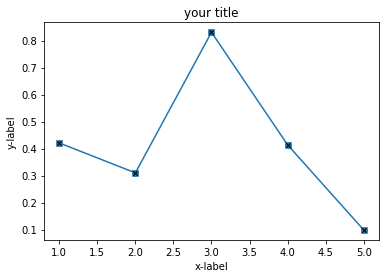

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# For this homework, you will need to get comfortable with matplotlib for specific functions, as well as answering
# free response questions
x = np.linspace(1, 5, 5)
y = np.random.rand(5)

# To create a figure:
fig = plt.figure()

# Title and axis
plt.title('your title')
plt.xlabel('x-label')
plt.ylabel('y-label')

# To plot you can use a variety of functions, such as .plot, .scatter, etc.
plt.plot(x, y)
plt.scatter(x, y)

# You can also add a third argument to change the shape/symbol of the points such as
plt.plot(x, y, 'kx') # this will plot 'x' marks instead of dots

# To save a figure:
fig.savefig('name-of-fig')